In [3]:
import sqlite3
import pandas as pd
import time
from IPython.core.display import clear_output

In [4]:
DB = "gpudata.db"

def run_query(q):
    with sqlite3.connect(DB) as conn:
        return pd.read_sql(q,conn)

def run_command(c):
    with sqlite3.connect(DB) as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(c)
        
def run_inserts(c, values):
    with sqlite3.connect(DB) as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(c, values) 
        
def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    '''
    return run_query(q)

In [5]:
#Create the gpu_specs table
c1 = """
CREATE TABLE gpu_specs(
    item_id TEXT PRIMARY KEY,
    name TEXT,
    series TEXT,
    chipset TEXT,
    memory TEXT,
    core_clock TEXT,
    ratings INTEGER
); 
"""

run_command(c1)

OperationalError: table gpu_specs already exists

In [6]:
#Create the gpu_prices table
c2 = """
CREATE TABLE gpu_prices(
    item_id TEXT,
    merchant_id INTEGER,    
    datetime FLOAT,
    price FLOAT,
    PRIMARY KEY(item_id, merchant_id, datetime)
    FOREIGN KEY(item_id) REFERENCES gpu_specs(item_id)
    FOREIGN KEY(merchant_id) REFERENCES merchants(merchant_id)
); 
"""

run_command(c2)

OperationalError: table gpu_prices already exists

In [7]:
#Create the gpu_businesses table
c3 = """
CREATE TABLE merchants(
    merchant_id INTEGER PRIMARY KEY AUTOINCREMENT,
    merchant_name TEXT
); 
"""

run_command(c3)

OperationalError: table merchants already exists

In [8]:
show_tables()

,name,type
0,sqlite_sequence,table
1,gpu_specs,table
2,gpu_prices,table
3,merchants,table


In [9]:
#Uncomment the lines to remove the table(s).
#run_command('''DROP TABLE gpu_specs;''')
#run_command('''DROP TABLE gpu_prices;''')
#run_command('''DROP TABLE merchants;''')

In [10]:
q1 = 'SELECT * FROM gpu_specs'
specs = run_query(q1)
print(len(specs))
specs.head()

557


,item_id,name,series,chipset,memory,core_clock,ratings
0,jZJkcf,Asus DUAL-GTX1060-O6G,Dual,GeForce GTX 1060 6GB,6GB,1.59GHz,45
1,TrGj4D,MSI GeForce GTX 1060 6GT OCV1,GT OCV1,GeForce GTX 1060 6GB,6GB,1.54GHz,8
2,Z8cMnQ,Asus STRIX-GTX1080TI-O11G-GAMING,STRIX GAMING OC,GeForce GTX 1080 Ti,11GB,1.57GHz,45
3,ttQRsY,MSI GTX 1050 Ti 4G OC,,GeForce GTX 1050 Ti,4GB,1.34GHz,9
4,ZWnG3C,MSI GTX 1070 TI GAMING 8G,,GeForce GTX 1070 Ti,8GB,1.61GHz,2


In [11]:
q2 = 'SELECT * FROM gpu_prices'
prices = run_query(q2)
print(len(prices))
prices.head()


38911


,item_id,merchant_id,datetime,price
0,24X2FT,1,1.505256e+09,183.53
1,24X2FT,1,1.509554e+09,161.69
2,24X2FT,1,1.509658e+09,159.85
3,24X2FT,1,1.510179e+09,170.04
4,24X2FT,1,1.510354e+09,159.85


In [12]:
prices['datetime'] = prices['datetime'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(x))) 
prices.head()

,item_id,merchant_id,datetime,price
0,24X2FT,1,2017-09-12,183.53
1,24X2FT,1,2017-11-01,161.69
2,24X2FT,1,2017-11-02,159.85
3,24X2FT,1,2017-11-08,170.04
4,24X2FT,1,2017-11-10,159.85


In [13]:
q3 = 'SELECT * FROM merchants'
merchants = run_query(q3)
merchants

,merchant_id,merchant_name
0,1,Newegg Marketplace
1,2,Newegg Business
2,3,Newegg
3,4,B&H
4,5,PCM
5,6,Walmart
6,7,SuperBiiz
7,8,Dell
8,9,OutletPC
9,10,Monoprice


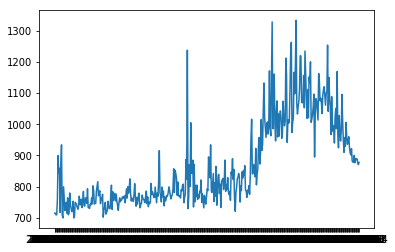

In [42]:
q_test = '''
SELECT 
    s.chipset,
    p.datetime,
    p.price
FROM gpu_specs s
INNER JOIN gpu_prices p ON s.item_id = p.item_id
'''

test_table = run_query(q_test)
test_table['datetime'] = test_table['datetime'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(x))) 
ten_eigties = test_table[test_table['chipset'] == 'GeForce GTX 1080 Ti']
grouped = ten_eigties.groupby(['datetime'])['price'].mean()
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(grouped.index, grouped.values)

In [21]:
url = 'http://{0}pcpartpicker.com/product/{1}?history_days={2}'.format('', '24X2FT', 730)
headers ={"User-Agent": "gpudata web scraper for research, contact me at https://codingdisciple.com"}
successful_connection = False
connection_attempts = 0
while not successful_connection:
    try:
        response = get(url=url, headers=headers)
        print('Connection successful.')
        successful_connection = True
    except:
        print('Connection unsuccessful, reconnecting...')
        connection_attempts += 1
        time.sleep(random.uniform(0, 1))
        if connection_attempts == 10:
            raise

Connection successful.


In [20]:
import random
from requests import get


In [34]:
successful_connection = False
while not successful_connection:
    try:
        print('a')
        successful_connection = True
    except:
        print('b')
        

a


In [37]:
not False

True

In [40]:
#Always executes
a = 0
while True:
    a += 1
    print(a)
    if a == 10:
        break

1
2
3
4
5
6
7
8
9
10


In [41]:
#not false = True, so it'll execute until variable turns True -> not True -> loop breaks
a = 0
variable = False
while not variable:
    a += 1
    print(a)
    if a == 10:
        variable = True

1
2
3
4
5
6
7
8
9
10
